# Logistic regression: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a logistic regression model to predict the class of digit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [11]:
# the data, shuffled and split between train and test sets 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

print('Training data : {}'.format(X_train_pre.shape))
print('Training target : {}'.format(y_train_pre.shape))
print('Test data : {}'.format(X_test_pre.shape))
print('Test target : {}'.format(y_test_pre.shape))

Training data : (60000, 28, 28)
Training target : (60000,)
Test data : (10000, 28, 28)
Test target : (10000,)


### Visualize data

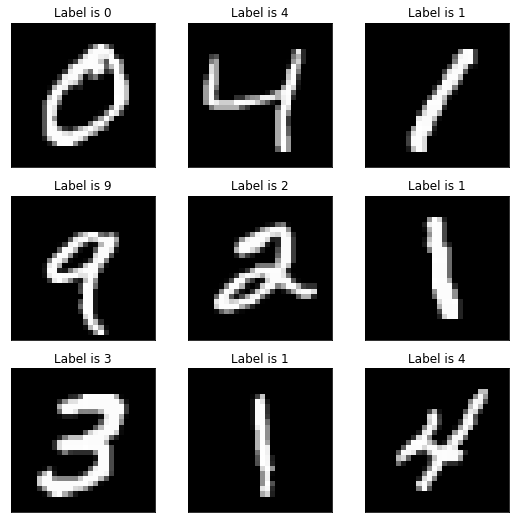

In [5]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    label = y_train_pre[i] #for文字
    img = X_train_pre[i,:] #for image
    fig.add_subplot(row, col, i)
    plt.title('Label is {}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

### Reshape and normalize the features

In [13]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. #normalize
X_test /= 255. #normalize

print('training data shape:', X_train.shape)
print('tesing data shape:', X_test.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
tesing data shape: (10000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [14]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,] #one-hot encoding

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## The model

### Build the model

In [15]:
#input number is 784
#change output number=10(y0, y1,...y9), activation function
#change loss function (how the machine learn), metrics(use for evaluation) --> accuracy: 1/ 0
def build_model():
    model = keras.Sequential([layers.Dense(num_classes, 
                                           input_dim=input_dim, 
                                           activation='softmax')])
    
    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [16]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
            
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        # if validation set is included, its loss is recorded in logs['val_loss']
        print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
              .format(epoch, t, logs['loss']))

EPOCHS = 10

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    callbacks=[PrintLoss()])

#batch_size default is 32

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6054 - accuracy: 0.8500
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.9079
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9155
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.9194
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2803 - accuracy: 0.9218
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2747 - accuracy: 0.9237
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.9255
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9258
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9276
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.9286

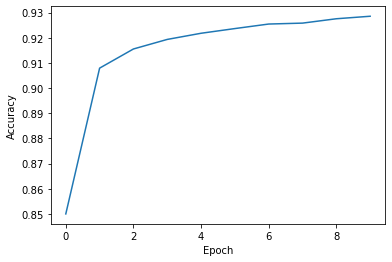

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'])

    plt.show()

    #call function
plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set loss: {:.2f}".format(loss))
print("Testing set accuracy: {:.2f}%".format(acc*100))

#the order is loss, accuracy(metric)

Testing set loss: 0.27
Testing set accuracy: 92.67%


Make predictions for testing data

In [23]:
y_pred = model.predict(X_test)
y_pred[:5]
#the result is the probabilit of each lavel

array([[1.30374974e-06, 1.44635640e-11, 5.89324145e-07, 2.16785795e-03,
        2.91075736e-07, 1.53585806e-05, 3.66264175e-13, 9.97417212e-01,
        7.77811783e-06, 3.89699155e-04],
       [1.37303316e-04, 4.60779887e-07, 9.97791886e-01, 4.09115455e-05,
        7.08979791e-14, 4.10312699e-04, 1.61304802e-03, 4.38778525e-19,
        6.20188848e-06, 2.01157768e-15],
       [6.85159250e-07, 9.83948648e-01, 8.96688644e-03, 2.12742575e-03,
        1.23003076e-04, 4.82822739e-04, 8.05603340e-04, 1.42096978e-04,
        3.28919291e-03, 1.13664464e-04],
       [9.99836564e-01, 2.93239655e-14, 3.32698146e-05, 2.63739798e-06,
        1.16609451e-08, 4.48365972e-05, 5.73253928e-05, 1.51221241e-06,
        1.39141775e-05, 9.91763864e-06],
       [2.92125012e-04, 3.70211453e-08, 1.72179460e-03, 3.23799286e-05,
        9.56022739e-01, 7.82844727e-05, 9.38165176e-04, 1.97409326e-03,
        3.73412902e-03, 3.52062695e-02]], dtype=float32)

In [25]:
#Aargmax is an operation that finds the argument that gives the maximum value from a target function
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

Visualize predictions

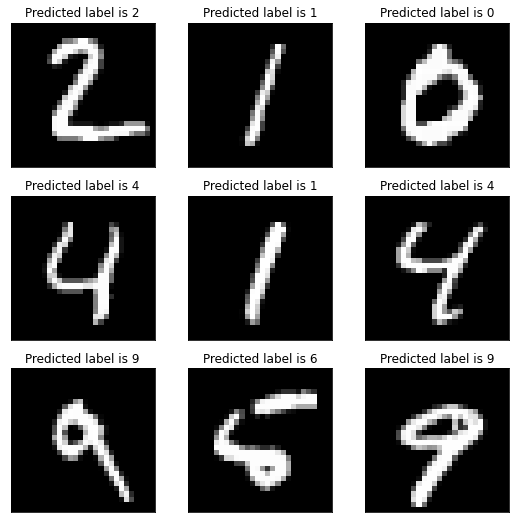

In [26]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()